In [5]:
# Importing Libraries
import numpy as np
import pandas as pd

In [6]:
# Load the uploaded dataset
data = pd.read_csv("Crop_recommendation.csv")

In [7]:
# Display the first few rows
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,25,12,26,28.569735,95.679067,6.436314,134.837035,coconut
1,99,15,27,27.042417,57.279275,6.501157,165.687212,coffee
2,5,136,195,22.356287,91.923605,6.264203,107.769741,apple
3,26,73,21,31.331708,57.974292,4.946264,161.782023,pigeonpeas
4,61,59,17,23.338446,59.245806,6.474443,105.008314,maize


In [8]:
# Display rows and columns of data
data.shape

(2200, 8)

In [9]:
# Basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# Finding Null Values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
# Checking Duplicate Values
data.duplicated().sum()

0

In [12]:
# Stastical Analysis of Data
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
# Checking Coorelation between data
corr=data.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

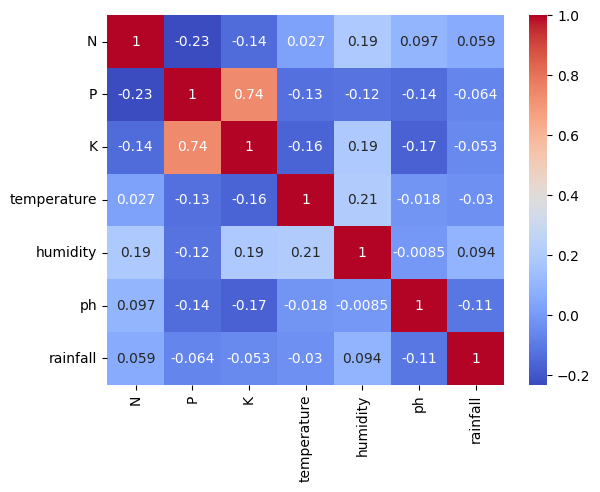

In [37]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar=True, cmap='coolwarm')


In [15]:
# Counting the values of labels present in file
data['label'].value_counts()

label
coconut        100
coffee         100
mothbeans      100
mungbean       100
jute           100
mango          100
banana         100
muskmelon      100
chickpea       100
orange         100
watermelon     100
papaya         100
lentil         100
cotton         100
kidneybeans    100
rice           100
blackgram      100
pomegranate    100
maize          100
pigeonpeas     100
apple          100
grapes         100
Name: count, dtype: int64

In [16]:
data_dict = {
    'rice' : 1,
    'maize': 2,
    'jute' : 3,     
    'cotton' : 4,
    'coconut': 5,    
    'papaya' : 6,    
    'orange' : 7,   
    'apple'  : 8,    
    'muskmelon' : 9,   
    'watermelon' : 10,
    'grapes' : 11,   
    'mango' : 12,    
    'banana' : 13,    
    'pomegranate' : 14,
    'lentil' : 15,
    'blackgram' : 16 ,  
    'mungbean' : 17,
    'mothbeans' : 18,  
    'pigeonpeas' : 19, 
    'kidneybeans' : 20, 
    'chickpea' : 21,
    'coffee' : 22,    
}

In [17]:
# Replacing crop names with numbers
data['label_num'] = data['label'].map(data_dict)

In [18]:
data['label_num'].value_counts()

label_num
5     100
22    100
18    100
17    100
3     100
12    100
13    100
9     100
21    100
7     100
10    100
6     100
15    100
4     100
20    100
1     100
16    100
14    100
2     100
19    100
8     100
11    100
Name: count, dtype: int64

In [19]:
data.drop(['label'],axis=1,inplace=True)

In [20]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label_num
0,25,12,26,28.569735,95.679067,6.436314,134.837035,5
1,99,15,27,27.042417,57.279275,6.501157,165.687212,22
2,5,136,195,22.356287,91.923605,6.264203,107.769741,8
3,26,73,21,31.331708,57.974292,4.946264,161.782023,19
4,61,59,17,23.338446,59.245806,6.474443,105.008314,2


In [21]:
# Distributing Input and Output
X = data.drop('label_num',axis=1) # Input Values
Y = data['label_num'] # Output Values 

In [22]:
# Checking if distributed properly or not
X.shape

(2200, 7)

In [23]:
Y.shape

(2200,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Spliting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1760, 7)

In [27]:
Y_train.shape

(1760,)

In [28]:
X_test.shape

(440, 7)

In [29]:
Y_test.shape

(440,)

In [30]:
# Scaleing the features to standardize them
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-0.28542458, -0.88447817, -0.45801991, ..., -0.9520402 ,
        -1.29260273, -0.14534199],
       [-1.01719562, -1.36562226, -0.71125181, ...,  0.94791057,
         0.81310037,  0.18774067],
       [ 0.25662804, -0.31311956, -0.08791176, ...,  0.51495942,
         1.20655327,  3.51710904],
       ...,
       [ 1.77437537, -0.91454967, -0.45801991, ..., -0.86948311,
         0.51366286,  0.64088017],
       [ 1.82858063, -0.28304805, -0.49697867, ...,  0.5094015 ,
         0.28795478, -0.6667488 ],
       [-0.50224563,  2.63388803,  3.02878853, ...,  0.51249215,
        -1.17642408, -0.66365314]])

In [33]:
# Training Model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initializing models
models = {
    "Naive Bayes" : GaussianNB(),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision tree" : DecisionTreeClassifier(random_state=42)
}

# Training and evaluating each model
from sklearn.metrics import classification_report

for name, model in models.items():
    # Training the model
    model.fit(X_train, Y_train)
    
    # Evaluating the model
    Y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(Y_test, Y_pred))



Model: Naive Bayes
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        22
           3       0.95      1.00      0.97        18
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        27
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        16
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        18
          17       1.00      1.00      1.00        20
        

In [34]:

# Training the Random Forest model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Making predictions and evaluating the model
Y_pred = nb_model.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import confusion_matrix
print(f"Model: {name}")
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Model: Decision tree
[[13  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

In [35]:
# Predicting Function
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Creating a DataFrame with column names matching the original training data
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    features = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]], columns=feature_names)
    
    # Scaling features
    transformed_features = sc.transform(features)
    
    # Making prediction
    prediction = nb_model.predict(transformed_features)
    return prediction[0]


In [38]:
N = 25
P = 12
K = 26
temprature = 28
humidity = 	95				
ph = 6
rainfall = 134

prediction = recommendation(N,P,K,temprature,humidity,ph,rainfall)

# Map prediction back to crop name
for crop, label in data_dict.items():
    if label == prediction:
        print(f"Recommended crop: {crop}")

Recommended crop: coconut
